In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime 
from haversine import haversine

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the Dataset

dataset=pd.read_csv("nyc_taxi_trip_duration.csv")
dataset.drop(columns=["Unnamed: 11","Unnamed: 12"],inplace=True)
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 9:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 6:42,17-02-2016 6:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
dataset.shape

(729322, 11)

Our Dataset contains 729322 rows and 11 columns

In [4]:
dataset[["passenger_count","trip_duration"]].describe()

,passenger_count,trip_duration
count,729322.000000,7.293220e+05
mean,1.662055,9.522291e+02
std,1.312446,3.864626e+03
min,0.000000,1.000000e+00
25%,1.000000,3.970000e+02
50%,1.000000,6.630000e+02
75%,2.000000,1.075000e+03
max,9.000000,1.939736e+06


In [5]:
dataset.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Our Data Doesn't have any missing values

In [6]:
dataset.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 9:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 6:42,17-02-2016 6:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


#### Some Datatypes need to be changed-
1. vendor_id, store_and_fwd_flag -> categorical
2. pickup_datetime, dropoff_datetime -> datetime

In [8]:
dataset.pickup_datetime = pd.to_datetime(dataset.pickup_datetime, format="%d-%m-%Y %H:%M")
dataset.dropoff_datetime = pd.to_datetime(dataset.dropoff_datetime, format="%d-%m-%Y %H:%M")

In [9]:
dataset.vendor_id=dataset["vendor_id"].astype("category")
dataset.store_and_fwd_flag=dataset["store_and_fwd_flag"].astype("category")

In [10]:
dataset.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

### We are creating a new variable which measures the Manhattan distance travelled by the taxi in each trip

In [11]:
dataset["distance"]=111139*abs(dataset.pickup_longitude-dataset.dropoff_longitude)+abs(dataset.pickup_latitude-dataset.dropoff_latitude)
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1106.547604
1,id0889885,1,2016-03-11 23:35:00,2016-03-11 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,715.684172
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,5477.637988
3,id3744273,2,2016-01-05 09:44:00,2016-01-05 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,543.539520
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,848,3216.204774


In [12]:
dataset["avg_speed"]=dataset["distance"]*60*60/(1000*dataset["trip_duration"])
dataset["avg_speed"]

0          9.958928
1          2.342239
2         12.060854
3          1.714936
4         13.653700
            ...    
729317    17.954202
729318     5.911312
729319     2.163636
729320     6.125573
729321    18.794059
Name: avg_speed, Length: 729322, dtype: float64

### Also, we are creating variables derived from Datetimes given to us

In [13]:
dataset['pickup_day_name'] = dataset['pickup_datetime'].dt.day_name()
dataset['dropoff_day_name']= dataset['dropoff_datetime'].dt.day_name()

In [14]:
dataset['pickup_time'] = dataset['pickup_datetime'].dt.hour
dataset['dropoff_time'] = dataset['dropoff_datetime'].dt.hour

dataset['pickup_month'] = dataset['pickup_datetime'].dt.month
dataset['dropoff_month'] = dataset['dropoff_datetime'].dt.month

In [15]:
dataset[dataset.pickup_datetime>dataset.dropoff_datetime]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time,pickup_month,dropoff_month


In [16]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1106.547604,9.958928,Monday,Monday,16,16,2,2
1,id0889885,1,2016-03-11 23:35:00,2016-03-11 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,715.684172,2.342239,Friday,Friday,23,23,3,3
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,5477.637988,12.060854,Sunday,Sunday,17,18,2,2
3,id3744273,2,2016-01-05 09:44:00,2016-01-05 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,543.539520,1.714936,Tuesday,Tuesday,9,10,1,1
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,848,3216.204774,13.653700,Wednesday,Wednesday,6,6,2,2


In [17]:
dataset.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,avg_speed,pickup_time,dropoff_time,pickup_month,dropoff_month
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.00000,729322.000000,729322.000000
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,2708.843903,10.629816,13.611698,13.60616,3.518410,3.518764
std,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,4355.018006,10.711357,6.402853,6.48637,1.680661,1.680815
min,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,690.218132,4.802708,9.000000,9.00000,2.000000,2.000000
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,1401.646452,9.042801,14.000000,14.00000,4.000000,4.000000
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,2682.035846,14.087260,19.000000,19.00000,5.000000,5.000000
max,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,660978.356561,4194.190315,23.000000,23.00000,6.000000,7.000000


### Checking Discrepencies in the Data Set (Data Validation)

## **ID**

In [18]:
dataset["id"].nunique()

729322

#### Each id uniquely identifies a row
<br>
We might want to see the patterns within these ids though

In [19]:
dataset.sort_values(["vendor_id","id"])[dataset.vendor_id==1]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time,pickup_month,dropoff_month
10128,id0000008,1,2016-06-15 09:57:00,2016-06-15 10:02:00,1,-74.009628,40.724762,-74.015869,40.715485,N,303,693.609994,8.240911,Wednesday,Wednesday,9,10,6,6
202448,id0000016,1,2016-03-29 16:36:00,2016-03-29 16:42:00,1,-73.960320,40.770321,-73.946220,40.772736,N,378,1566.964512,14.923472,Tuesday,Tuesday,16,16,3,3
280314,id0000045,1,2016-03-05 21:58:00,2016-03-05 22:17:00,1,-73.991257,40.699097,-73.932961,40.686829,N,1162,6478.993640,20.072614,Saturday,Saturday,21,22,3,3
645298,id0000057,1,2016-06-16 07:48:00,2016-06-16 08:12:00,1,-74.007477,40.717373,-73.955688,40.764503,N,1427,5755.750338,14.520463,Thursday,Thursday,7,8,6,6
259565,id0000064,1,2016-05-15 12:54:00,2016-05-15 13:10:00,1,-73.969063,40.755081,-73.991035,40.727974,N,987,2442.045456,8.907157,Sunday,Sunday,12,13,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172708,id3999922,1,2016-05-08 01:35:00,2016-05-08 01:41:00,1,-74.010101,40.732510,-74.004707,40.752014,N,347,599.501048,6.219607,Sunday,Sunday,1,1,5,5
418258,id3999969,1,2016-05-15 14:40:00,2016-05-15 14:51:00,1,-73.949844,40.772282,-73.974129,40.756592,N,668,2698.955176,14.545267,Sunday,Sunday,14,14,5,5
107781,id3999974,1,2016-06-02 15:42:00,2016-06-02 15:47:00,1,-73.984360,40.743275,-73.992043,40.730942,N,316,853.871042,9.727645,Thursday,Thursday,15,15,6,6
340329,id3999985,1,2016-04-25 08:46:00,2016-04-25 08:54:00,1,-73.950851,40.826179,-73.969780,40.799995,N,476,2103.724080,15.910518,Monday,Monday,8,8,4,4


## **Vendor_ID**

In [20]:
display(dataset["vendor_id"].value_counts())
print("Total- "+ str(dataset["vendor_id"].value_counts().sum()))

2    390481
1    338841
Name: vendor_id, dtype: int64

Total- 729322


Text(0.5, 0, 'Vendor ID')

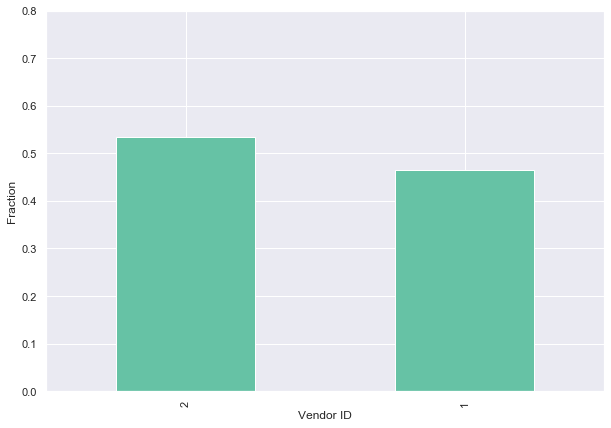

In [21]:
sns.set(palette="Set2")

plt.figure(figsize=(10,7))
plt.ylim((0.0,0.8))

dataset["vendor_id"].value_counts(normalize=True).plot(kind='bar')

plt.ylabel("Fraction")
plt.xlabel("Vendor ID")

#### vendor_id has two unique categories- 1 and 2
Vendor 2 gets slightly more rides than Vendor 1

## **Passenger_count**

In [22]:
dataset["passenger_count"].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

### We see that there is passenger_count of 0 as well, what would that mean?
We should inspect this 

In [23]:
dataset[dataset["passenger_count"]==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time,pickup_month,dropoff_month
3572,id3364866,1,2016-02-13 14:04:00,2016-02-13 14:21:00,0,-73.990479,40.742004,-73.989243,40.763679,N,1029,137.386145,0.480651,Saturday,Saturday,14,14,2,2
23847,id3485118,1,2016-05-11 19:15:00,2016-05-11 19:32:00,0,-73.987572,40.754566,-73.972031,40.762836,N,981,1727.228360,6.338453,Wednesday,Wednesday,19,19,5,5
45987,id2571672,1,2016-03-06 05:24:00,2016-03-06 05:25:00,0,-73.979698,40.761196,-73.979698,40.761196,Y,5,0.000000,0.000000,Sunday,Sunday,5,5,3,3
76998,id1253169,1,2016-02-28 01:08:00,2016-02-28 01:09:00,0,-74.035942,40.736488,-74.035942,40.736492,N,13,0.000004,0.000001,Sunday,Sunday,1,1,2,2
101709,id1220914,2,2016-01-17 20:51:00,2016-01-17 20:52:00,0,-73.959999,40.766861,-73.960106,40.766911,N,48,11.871918,0.890394,Sunday,Sunday,20,20,1,1


There are many trips which have trip_duration less than 10 seconds 

In [24]:
dataset[dataset["passenger_count"]==0].sort_values("distance").head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time,pickup_month,dropoff_month
501596,id3066152,1,2016-02-01 00:27:00,2016-02-01 00:27:00,0,-74.014488,40.708229,-74.014488,40.708229,N,45,0.0,0.0,Monday,Monday,0,0,2,2
592303,id2154895,1,2016-05-23 23:37:00,2016-05-23 23:37:00,0,-73.861633,40.705029,-73.861633,40.705029,N,8,0.0,0.0,Monday,Monday,23,23,5,5
45987,id2571672,1,2016-03-06 05:24:00,2016-03-06 05:25:00,0,-73.979698,40.761196,-73.979698,40.761196,Y,5,0.0,0.0,Sunday,Sunday,5,5,3,3
568782,id3533680,1,2016-01-10 04:17:00,2016-01-10 04:17:00,0,-73.993195,40.598701,-73.993195,40.598701,N,3,0.0,0.0,Sunday,Sunday,4,4,1,1
541539,id1610720,2,2016-03-13 14:08:00,2016-03-13 14:08:00,0,-73.922081,40.636040,-73.922081,40.636040,N,8,0.0,0.0,Sunday,Sunday,14,14,3,3


There are many which covered 0 metres, maybe trip was started by mistake and then realised by the driver later

In [25]:
dataset[dataset["trip_duration"]<10].sort_values("distance").head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time,pickup_month,dropoff_month
195197,id2251007,2,2016-05-23 14:20:00,2016-05-23 14:20:00,1,-73.781830,40.644699,-73.781830,40.644699,N,8,0.0,0.0,Monday,Monday,14,14,5,5
543304,id3062678,1,2016-04-06 21:38:00,2016-04-06 21:38:00,1,-73.982010,40.757099,-73.982010,40.757099,N,4,0.0,0.0,Wednesday,Wednesday,21,21,4,4
443300,id2509635,1,2016-03-07 10:52:00,2016-03-07 10:52:00,1,-73.790337,40.643955,-73.790337,40.643955,N,2,0.0,0.0,Monday,Monday,10,10,3,3
301923,id1792292,1,2016-06-30 18:09:00,2016-06-30 18:09:00,1,-73.794342,40.657082,-73.794342,40.657082,N,2,0.0,0.0,Thursday,Thursday,18,18,6,6
547110,id1189877,1,2016-04-06 12:35:00,2016-04-06 12:35:00,1,-73.891350,40.646751,-73.891350,40.646751,N,5,0.0,0.0,Wednesday,Wednesday,12,12,4,4


In [26]:
xy=dataset["passenger_count"].value_counts().to_frame().reset_index()
xy=xy.rename(columns={"passenger_count":"count","index":"passenger_count"})
xy=xy.sort_values(by="passenger_count")
xy["count"]=xy["count"]/dataset.shape[0]
xy

,passenger_count,count
6,0,0.000045
0,1,0.709447
1,2,0.144102
3,3,0.040712
5,4,0.019264
2,5,0.053373
4,6,0.033054
8,7,0.000001
7,9,0.000001


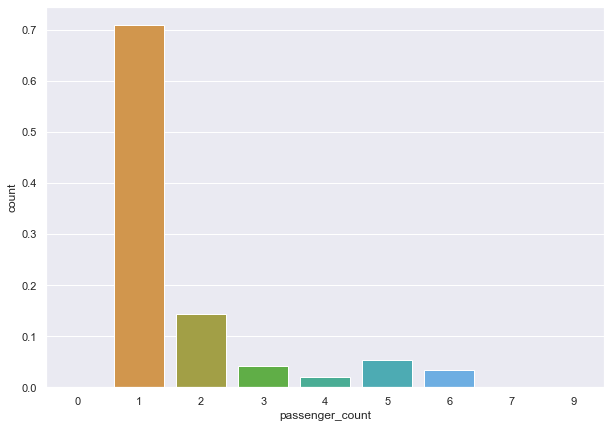

In [27]:
sns.set(palette="Set2")
plt.figure(figsize=(10,7))

sns.barplot(data=xy, y="count",x="passenger_count")

Around 71% of rides have only one passenger where as 14.5% have 2 passengers.

There are rides with 0,7 and 9 passengers as well.
We still have to investigate what is up with 0 passenger list.

We can also infer that people who carpool are very less.

In [28]:
display(dataset["store_and_fwd_flag"].value_counts(normalize=True))

N    0.994461
Y    0.005539
Name: store_and_fwd_flag, dtype: float64

Text(0.5, 0, 'store_and_fwd_flag')

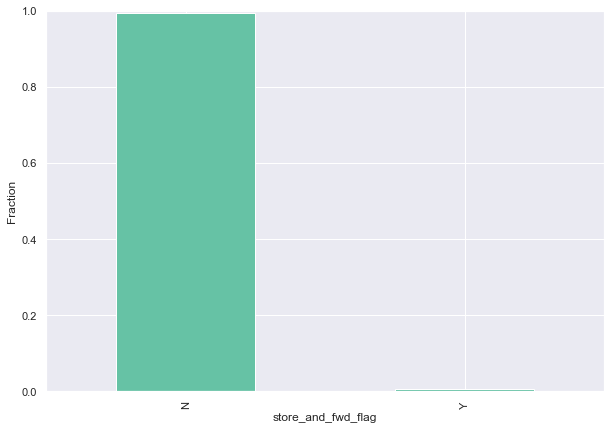

In [29]:
sns.set(palette="Set2")
plt.figure(figsize=(10,7))
plt.ylim((0.0,1.0))

dataset["store_and_fwd_flag"].value_counts(normalize=True).plot(kind='bar')

plt.ylabel("Fraction")
plt.xlabel("store_and_fwd_flag")

### 99.45 % of rides did not have any internet connection problems
Maybe the rest 0.55% of rides were intercity or to remote areas.
We should check if the 'Y' flagged have travelled more distance and hence the average time taken for the ride is more?

## **Distance**

In [30]:
dataset["distance"]

0         1106.547604
1          715.684172
2         5477.637988
3          543.539520
4         3216.204774
             ...     
729317    1476.234374
729318     517.239761
729319     404.479760
729320     760.591984
729321    6389.980029
Name: distance, Length: 729322, dtype: float64

In [31]:
dataset.distance.describe()

count    729322.000000
mean       2708.843903
std        4355.018006
min           0.000000
25%         690.218132
50%        1401.646452
75%        2682.035846
max      660978.356561
Name: distance, dtype: float64

In [32]:
dataset[dataset.distance==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time,pickup_month,dropoff_month
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,240,0.0,0.0,Tuesday,Tuesday,11,11,6,6
327,id0786923,2,2016-03-26 13:34:00,2016-03-26 13:37:00,1,-73.996323,40.753460,-73.996323,40.753460,N,159,0.0,0.0,Saturday,Saturday,13,13,3,3
795,id2323213,2,2016-06-13 16:49:00,2016-06-13 17:04:00,5,-73.967171,40.763500,-73.967171,40.763500,N,897,0.0,0.0,Monday,Monday,16,17,6,6
1176,id3235868,1,2016-02-29 21:39:00,2016-02-29 21:44:00,1,-73.995232,40.744038,-73.995232,40.744038,N,256,0.0,0.0,Monday,Monday,21,21,2,2
1257,id1865738,2,2016-03-13 11:38:00,2016-03-13 12:00:00,2,-73.912781,40.804428,-73.912781,40.804428,N,1330,0.0,0.0,Sunday,Sunday,11,12,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728720,id3423342,2,2016-05-05 21:32:00,2016-05-05 21:32:00,2,-73.977898,40.766392,-73.977898,40.766392,N,14,0.0,0.0,Thursday,Thursday,21,21,5,5
728775,id2618105,2,2016-03-13 20:06:00,2016-03-13 20:14:00,1,-73.974258,40.759895,-73.974258,40.759895,N,464,0.0,0.0,Sunday,Sunday,20,20,3,3
728838,id1232120,2,2016-05-29 04:04:00,2016-05-29 04:11:00,2,-73.984558,40.750839,-73.984558,40.750839,N,421,0.0,0.0,Sunday,Sunday,4,4,5,5
729025,id3524028,2,2016-04-06 18:03:00,2016-04-06 18:26:00,1,-74.083611,40.632401,-74.083611,40.632401,N,1369,0.0,0.0,Wednesday,Wednesday,18,18,4,4


**Around 3000 records has trips of zero distance, this could be due to various reasons like** :

- System error
- Rider cancelled the ride after accepting
- passenger canncelled after accepting

distance
(0, 10]     679797
(10, 20]     31357
(20, 30]     15010
(30, 40]       131
(40, 50]        69
(50, 60]        18
(60, 70]         8
(70, 80]         7
(80, 90]         9
Name: distance, dtype: int64

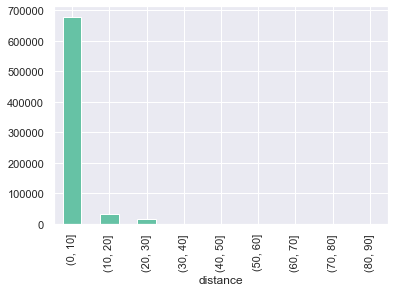

In [33]:
ab=(dataset['distance']/1000).groupby(pd.cut(dataset['distance']/1000, np.arange(0,100,10))).count()
display(ab)
ab.plot(kind='bar')
plt.show()

Most of our trips are between 0 and 10 kms, some between 10 and 20 also, 20 and 30.
<br>Very few beyond 30 kms

In [34]:
def cont_univ(x):
    sns.set(palette="Set1")
    plt.figure(figsize=(10,8))
    
    figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


    
    sns.distplot(x,bins=25,kde=True,ax=ax[0])
    ax[0].set_title('Distribution of the trip duration')
    
    # calculating descriptives of variable
    mini = x.min()
    maxi = x.max()
    ran = x.max()-x.min()
    mean = x.mean()
    median = x.median()
    st_dev = x.std()
    skew = x.skew()
    kurt = x.kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    sns.lineplot(points, [0,0], color = 'black', label = "std_dev",ax=ax[0])
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max",ax=ax[0])
    sns.scatterplot([mean], [0], color = 'red', label = "mean",ax=ax[0])
    sns.scatterplot([median], [0], color = 'blue', label = "median",ax=ax[0])
    
    ax[0].set_title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    
    sns.boxplot(x,ax=ax[1])
    ax[1].set_title('box plot of trip duration')

    
    plt.tight_layout()

<Figure size 720x576 with 0 Axes>

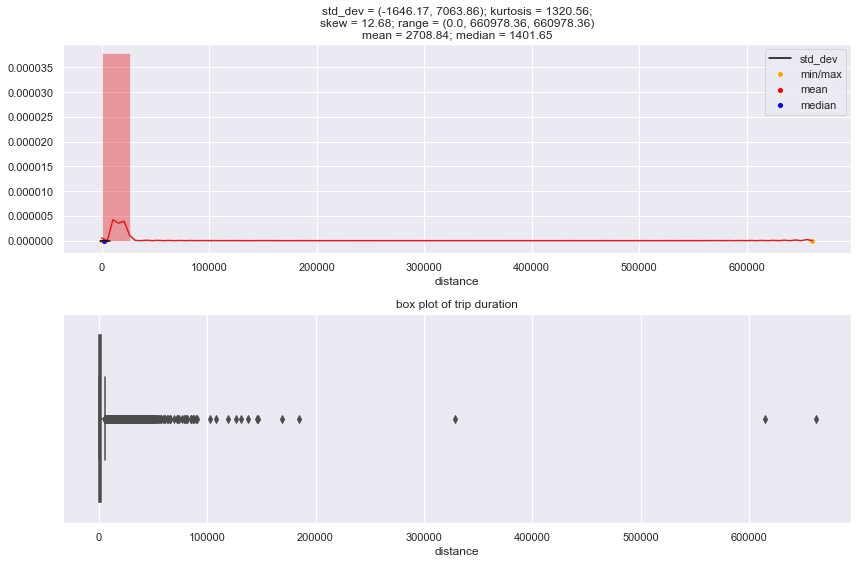

In [35]:
cont_univ(dataset.distance)

<Figure size 720x576 with 0 Axes>

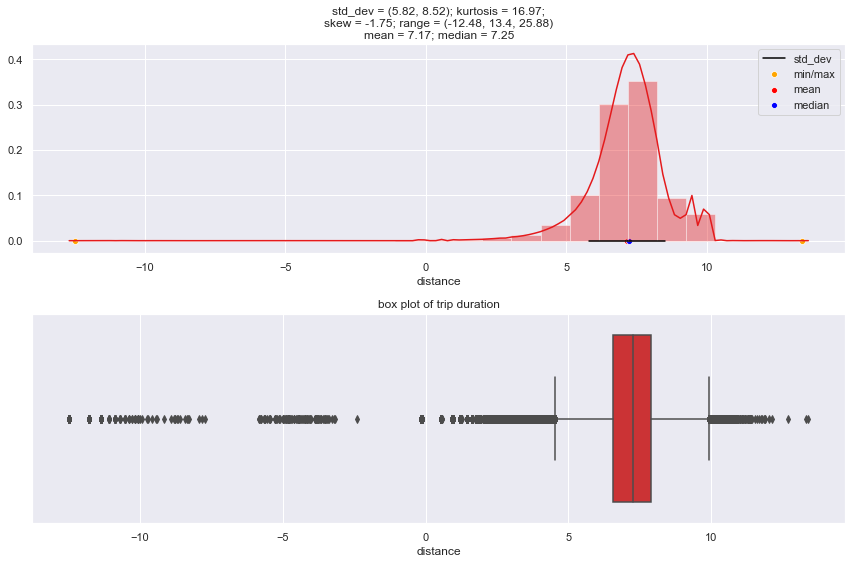

In [36]:
cont_univ(np.log(dataset[dataset.distance>0].distance))

When we logtransform our distance variable and see its distribution, we can see that it is Leptokurtic and slightly negatively skewed
<br>Whereas there are a lot of outliers in the original distance without log transform

<Figure size 720x576 with 0 Axes>

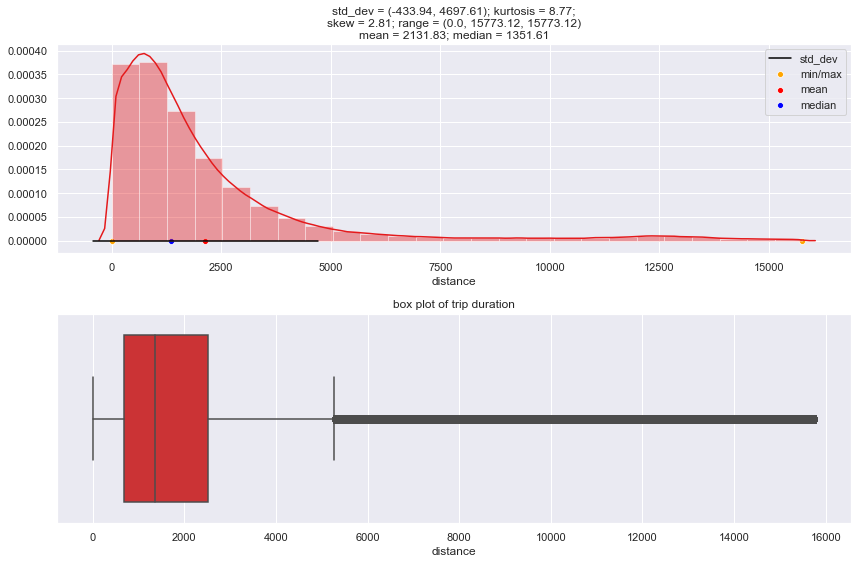

In [37]:
cont_univ(dataset[(dataset.distance<(dataset.distance.mean()+3*dataset.distance.std())) & (dataset.distance>(dataset.distance.mean()-3*dataset.distance.std()))].distance
)

After removing the outliers, we can see that the distribution looks more like a normal distribution

## **Trip_Duration**

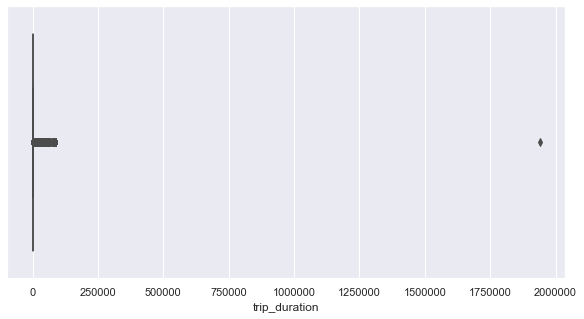

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(dataset['trip_duration'],orient='h')

We can clearly see that there is one point with very large value, let's analyse that one value

In [39]:
dataset[dataset.trip_duration==dataset.trip_duration.max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_day_name,dropoff_day_name,pickup_time,dropoff_time,pickup_month,dropoff_month
21813,id1864733,1,2016-01-05 00:19:00,2016-01-27 11:08:00,1,-73.78965,40.643559,-73.95681,40.773087,N,1939736,18578.129214,0.03448,Tuesday,Wednesday,0,11,1,1


This looks like a 22 day trip! We have to further investigate this.

<Figure size 720x576 with 0 Axes>

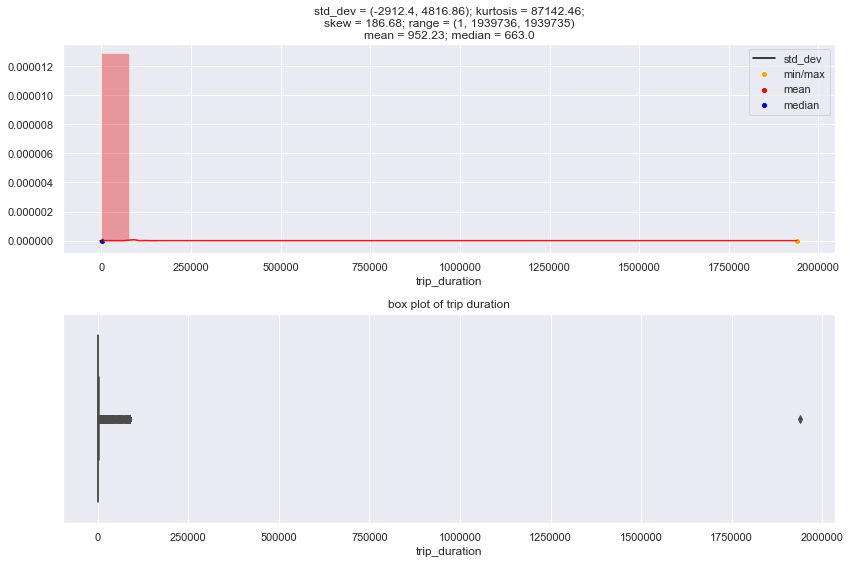

In [40]:
cont_univ(dataset.trip_duration)

<Figure size 720x576 with 0 Axes>

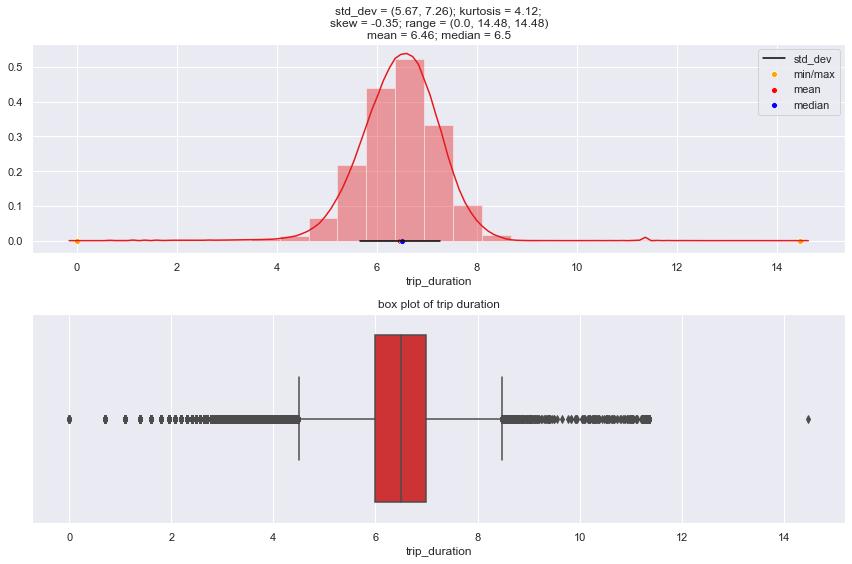

In [41]:
cont_univ(np.log(dataset[dataset.trip_duration>0].trip_duration))

<Figure size 720x576 with 0 Axes>

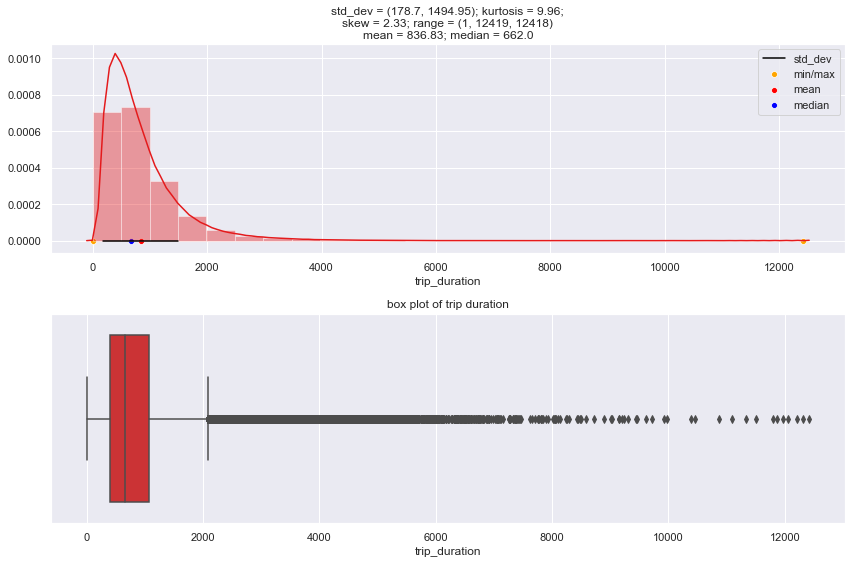

In [42]:
cont_univ(dataset[(dataset.trip_duration<(dataset.trip_duration.mean()+3*dataset.trip_duration.std())) & (dataset.trip_duration>(dataset.trip_duration.mean()-3*dataset.trip_duration.std()))].trip_duration)

When we log-transform, we can see that the chart looks like a normal distribution. So, we can see that our variable follows lognormal distribution

## **avg_speed**

In [43]:
dataset.avg_speed.describe()

count    729322.000000
mean         10.629816
std          10.711357
min           0.000000
25%           4.802708
50%           9.042801
75%          14.087260
max        4194.190315
Name: avg_speed, dtype: float64

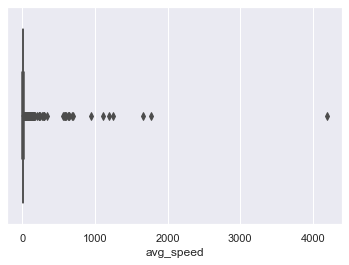

In [44]:
sns.boxplot(dataset.avg_speed)

In [45]:
refined=dataset[dataset.avg_speed<=200]
refined.shape

(729294, 19)

We have removed all the speeds which were unreal, as this high speed is not permitted on road for taxis

<Figure size 720x576 with 0 Axes>

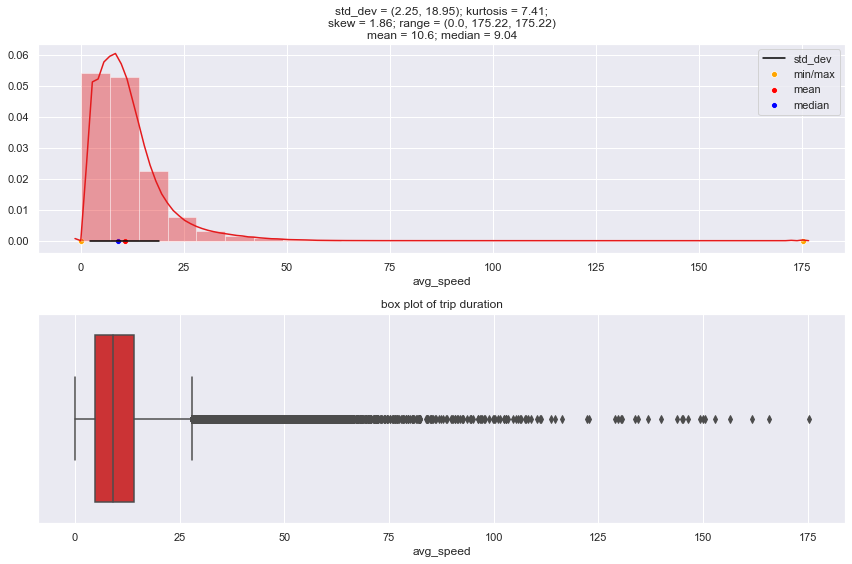

In [46]:
cont_univ(refined.avg_speed)

## Time related Variables

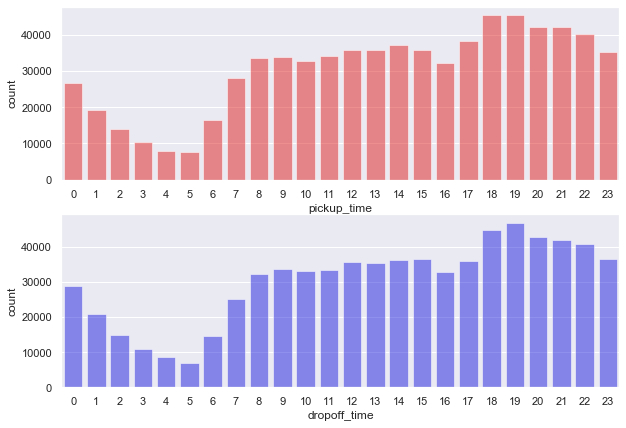

In [47]:
figure,ax= plt.subplots(nrows=2,ncols=1,figsize=(10,7))

sns.countplot(dataset.pickup_time,color='r',alpha=0.5,ax=ax[0])
sns.countplot(dataset.dropoff_time,color='b',alpha=0.5,ax=ax[1])

Shape more or less looks the same
<br>7-8PM,8-9PM are the busiest

In [48]:
cut_bins = [0,5,10,15,20,24]
names = ['Early Morning','Office Hours','Noon Hours','Evening','Night']

dataset['Pick_time_frame'] = pd.cut(dataset['pickup_time'],bins=cut_bins,labels=names)

dataset['Drop_time_frame'] = pd.cut(dataset['dropoff_time'],bins=cut_bins,labels=names)

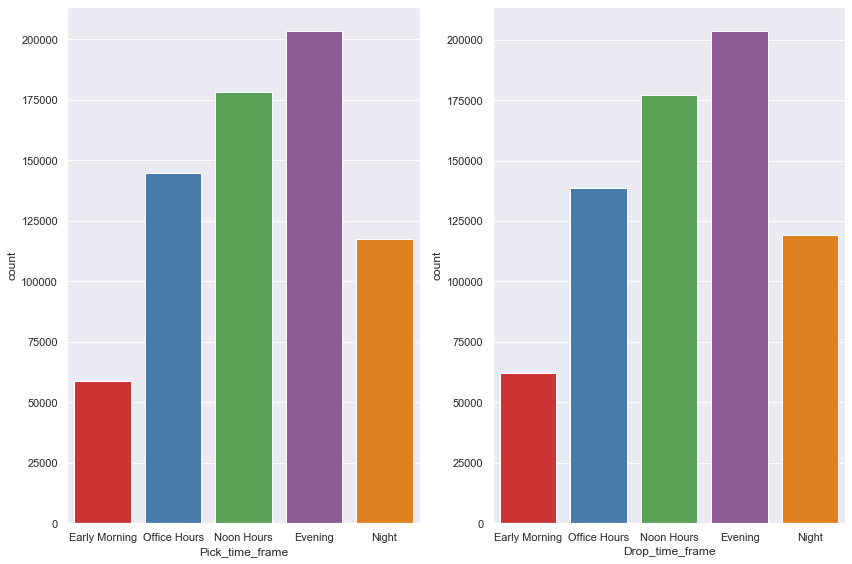

In [49]:
figure,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,8))

sns.countplot(dataset['Pick_time_frame'],ax=ax[0])

sns.countplot(dataset['Drop_time_frame'],ax=ax[1])

plt.tight_layout()

Most number of trips are during the evening time and the least number of trips is between late night to early morning

## **Day Wise**

In [50]:
dataset['pickup_month'].value_counts()

3    128316
4    125634
5    124201
2    119364
6    117406
1    114401
Name: pickup_month, dtype: int64

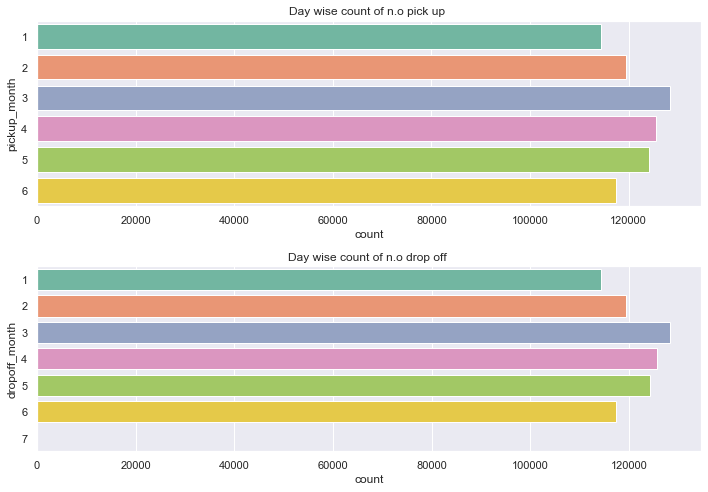

In [51]:
sns.set(palette="Set2")


figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,7))

sns.countplot(y='pickup_month', data=dataset,ax=ax[0])
ax[0].set_title('Day wise count of n.o pick up ')

sns.countplot(y='dropoff_month',data=dataset,ax=ax[1])
ax[1].set_title('Day wise count of n.o drop off ')

plt.tight_layout()

- March and April has the most number of trips

In [52]:
dataset['pickup_day_name'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day_name, dtype: int64

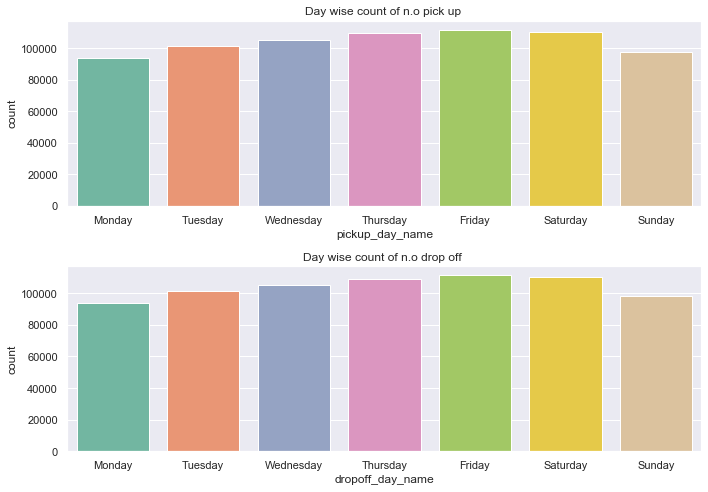

In [53]:
sns.set(palette="Set2")


figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,7))

sns.countplot(x='pickup_day_name', order= ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"] ,data=dataset,ax=ax[0])
ax[0].set_title('Day wise count of n.o pick up ')

sns.countplot(x='dropoff_day_name',order= ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],data=dataset,ax=ax[1])
ax[1].set_title('Day wise count of n.o drop off ')

plt.tight_layout()

- Highest number of rides are recorded on friday's and Saturday's.

- Monday has the least number of trips. Also we can see a trend of increasing trips from monday to saturday and a decreasing trend from sunday through monday

In [54]:
dataset['duration_in_mins'] = dataset['trip_duration']/60

## Bivariate Analysis

##### Vendor and duration analysis

Text(0.5, 1.0, 'vendor and duration')

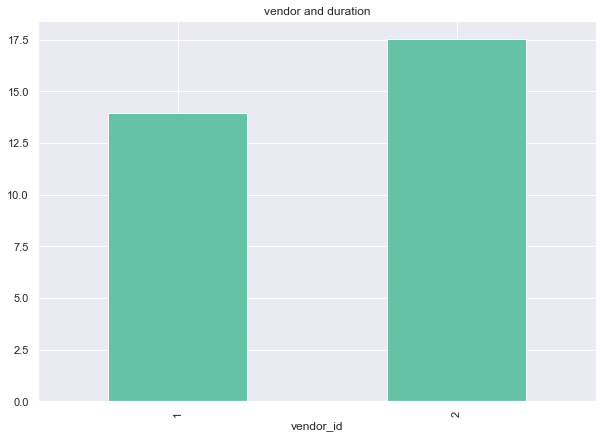

In [55]:
plt.figure(figsize=(10,7))

dataset.groupby('vendor_id')['duration_in_mins'].mean().plot(kind='bar')

plt.title('vendor and duration')

- We know that vendor 2 had more number of trips, so this is something which we expected. 
- Average time taken by vendor 2 is approx. 3 mins more than vendor 1.

In [56]:
dataset.groupby('vendor_id')['distance','avg_speed','duration_in_mins'].mean()

,distance,avg_speed,duration_in_mins
vendor_id,,,
1,2668.309508,10.586744,13.951600
2,2744.017740,10.667191,17.535604


- Average Distance travelled by the vendor 2 is higher than the vendor 1

In [57]:
cut_bins = [0,10,50,700]
names = ['short','medium','long']
dataset['distance_bins'] = pd.cut(dataset['distance'],bins=cut_bins, labels=names)

In [58]:
dataset.groupby('distance_bins').vendor_id.value_counts().reset_index(name='count').pivot("distance_bins","vendor_id","count")

vendor_id,1,2
distance_bins,,
short,2109,1721
medium,4863,5405
long,78371,89688


One interesting thing here is vendor 1 has taken more long trips than vendor 1

In [59]:
# plt.figure(figsize=(10,7))

# sns.countplot(x='distance_bins',data=dataset,hue='vendor_id')

##### Passenger and Duration Analysis

Text(0.5, 1.0, 'Passenger counts distribution on duration')

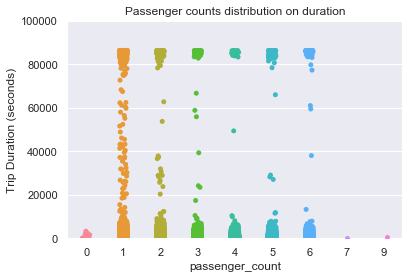

In [60]:
sns.stripplot(x="passenger_count",y="trip_duration",data=dataset,dodge=True)
plt.ylim(0,100000)

plt.ylabel('Trip Duration (seconds)')
plt.title('Passenger counts distribution on duration')

- We can see that trip duration is distributed only for passenger 1 and passenger with count 7 and 9 have lesser trip durations
- We also have anamolies with 0 passengers and outliers as well

Text(0.5, 1.0, 'Passenger count vs time duration')

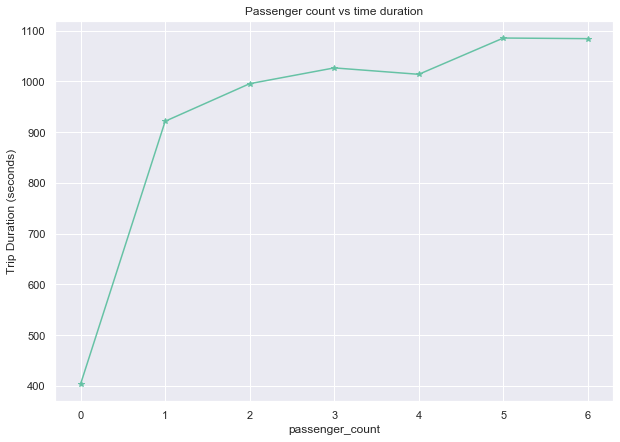

In [61]:
plt.figure(figsize=(10,7))

dataset.groupby(dataset[dataset['passenger_count'] < 7]['passenger_count'])['trip_duration'].mean().plot(kind='line',marker='*')


plt.ylabel('Trip Duration (seconds)')
plt.title('Passenger count vs time duration')

- Here we can see that there is good correlation between passenger counts and time duration. The more the number of passengers the more is the time taken

Text(0.5, 1.0, 'Vendor and passenger counts')

<Figure size 720x504 with 0 Axes>

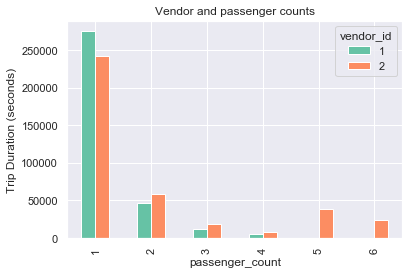

In [62]:
plt.figure(figsize=(10,7))

dataset_1= dataset[~((dataset.passenger_count==0) | (dataset.passenger_count==7) | (dataset.passenger_count==9))]

dataset_1.groupby('passenger_count').vendor_id.value_counts().reset_index(name='count').pivot("passenger_count","vendor_id","count").plot(kind='bar')

plt.ylabel('Trip Duration (seconds)')
plt.title('Vendor and passenger counts')

Vendor 1 has taken more trips with 1 passenger, and vendor 2 has more trips with 5 & 6 passengers

- This would mean that vendor 2 has more capacity cars
- This adds up to our previous analysis on why vendor 2 has more time avaerage trip time

Text(0.5, 1.0, 'Passenger count and Distance')

<Figure size 720x504 with 0 Axes>

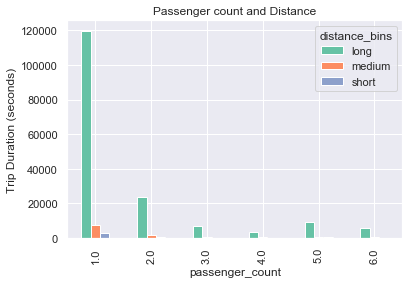

In [63]:
plt.figure(figsize=(10,7))

dataset.groupby(dataset[(dataset['passenger_count'] > 0) & (dataset['passenger_count'] < 7) ]['passenger_count'])['distance_bins'].value_counts().reset_index(name='count').pivot("passenger_count","distance_bins","count").plot(kind='bar')

plt.ylabel('Trip Duration (seconds)')
plt.title('Passenger count and Distance')

In [64]:
dataset.groupby(dataset[(dataset['passenger_count'] > 0) & (dataset['passenger_count'] < 7)]['passenger_count'])['distance_bins'].value_counts().reset_index(name='count').pivot("passenger_count","distance_bins","count")

distance_bins,long,medium,short
passenger_count,,,
1.0,119836,7377,2866
2.0,23546,1404,522
3.0,6813,404,111
4.0,3282,188,61
5.0,8994,565,157
6.0,5585,327,98


- Here we can see that invariable of the passenger counts most of the trips are short trips.

- **Interesting thing** - trips with passenger count as 1 has the most long and medium trips

##### Time and Day Analysis

Text(0.5, 1.0, 'Day vs duration')

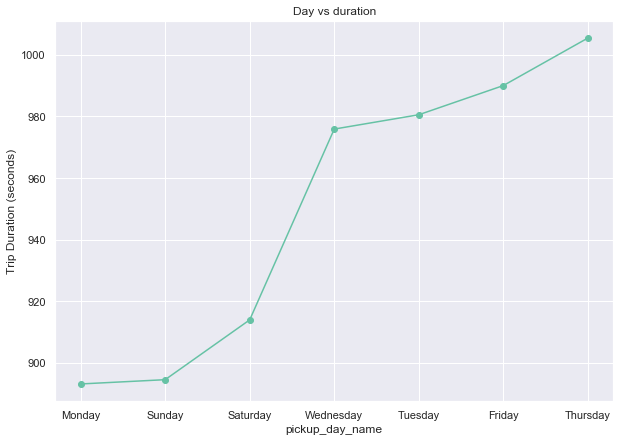

In [65]:
plt.figure(figsize=(10,7))

dataset.groupby('pickup_day_name')['trip_duration'].mean().sort_values().plot(kind='line',marker='o')

plt.ylabel('Trip Duration (seconds)')
plt.title('Day vs duration')

We can see that the trips are more longer during Thurday and Friday
 * As per our hypotheses we stated we could see lesser trip duration during the weekend. But whats suprising is lesser trip duration during saturday, as most number of trips occur during saturday
     - the reason might be traffic 

Text(0.5, 1.0, 'Mean duration per hour')

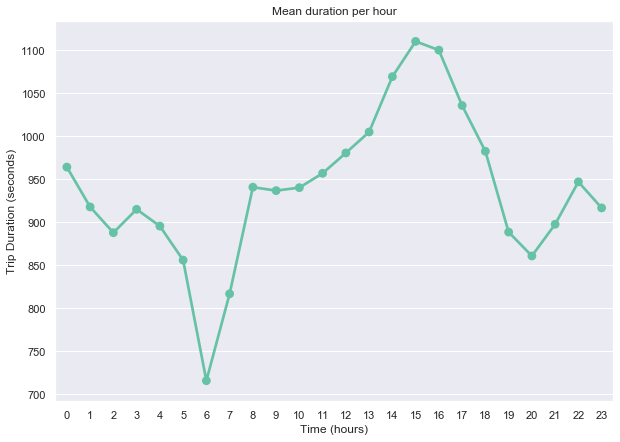

In [66]:
plt.figure(figsize=(10,7))

new1 = dataset.groupby('pickup_time').trip_duration.mean()
sns.pointplot(new1.index, new1.values)

plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Time (hours)')
plt.title('Mean duration per hour')

- Trip duration is least at 6 AM, might be due to less traffic less number of rides

- Trip duration during the morning hours post 8 AM is high this might be due to traffic and peek hours

- Night trips are lesser but still are reasonably longer , and this might be due to less number of cabs availability or interior drop points

- we further need to analyse the distance travelled by hour to get and clear idea on this

Text(0.5, 1.0, 'Mean duration per month')

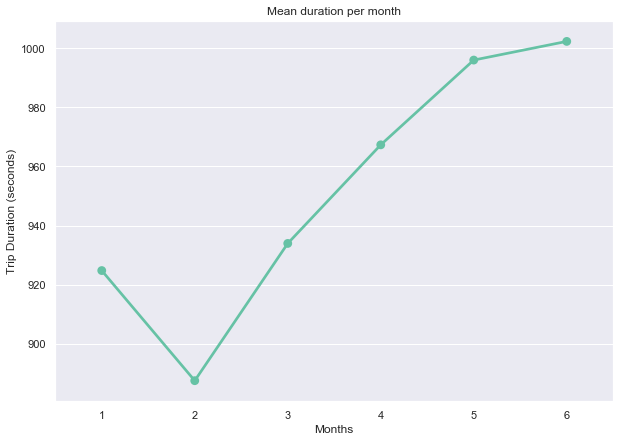

In [67]:
plt.figure(figsize=(10,7))

new1 = dataset.groupby('pickup_month').trip_duration.mean()
sns.pointplot(new1.index, new1.values)

plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Months')
plt.title('Mean duration per month')

- June has the most mean duration.
- **Note**
- Month March and April had the most number of trips but the trip duration is lower than May and June

##### Distance and Duration 

Text(0.5, 1.0, 'Distance and Duration')

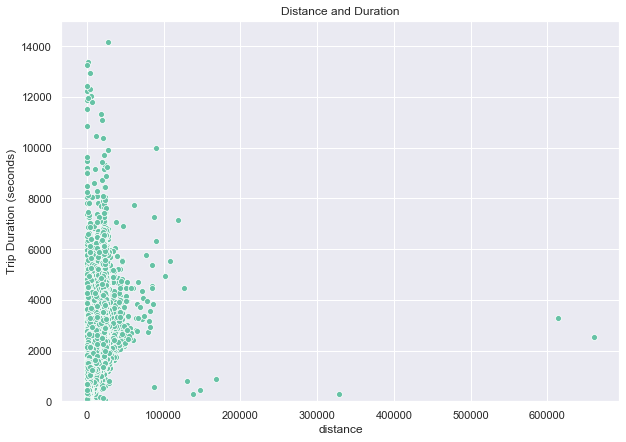

In [68]:
plt.figure(figsize=(10,7))

sns.scatterplot(x="distance",y="trip_duration",data=dataset)
plt.ylim(0,15000)
plt.ylabel('Trip Duration (seconds)')

plt.title('Distance and Duration')

- We can see chunk of values between 0 to 150 kms being linear with respect to trip duration ie is less than 5000 seconds,where most of our data is present

- There are many extreme outlier in this distance parameter

Text(0.5, 1.0, 'Mean distance per hour')

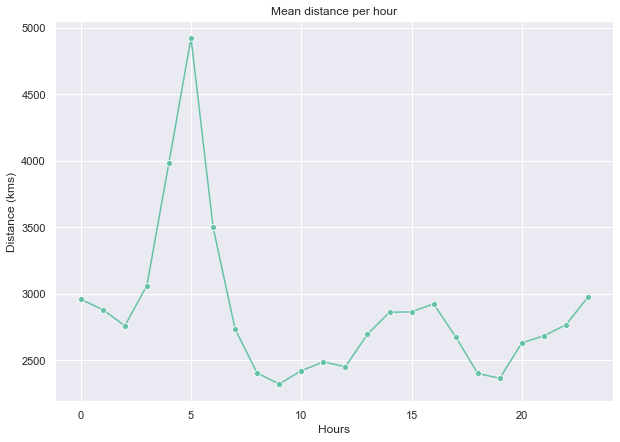

In [69]:
plt.figure(figsize=(10,7))

new1 = dataset.groupby('pickup_time').distance.mean()
sns.lineplot(new1.index, new1.values,marker='o',)

plt.ylabel('Distance (kms)')
plt.xlabel('Hours')
plt.title('Mean distance per hour')

- Highest average distance is travelled during late night to early morning. this gives us the reasoning for the longer trip time analysed above

- Also we can see that morning to evening commutes are of shorter distance.

Text(0.5, 1.0, 'Mean distance per month')

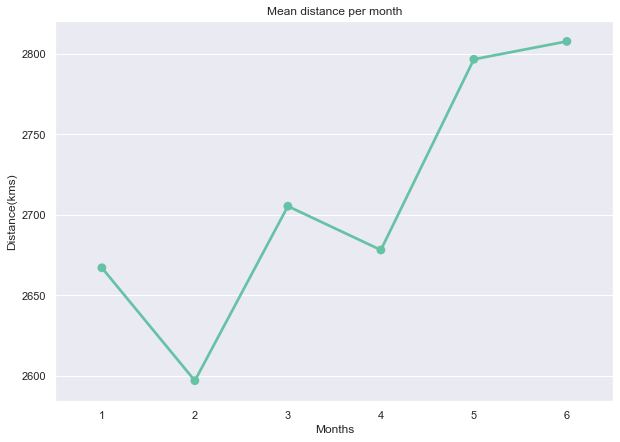

In [70]:
plt.figure(figsize=(10,7))

new1 = dataset.groupby('pickup_month').distance.mean()
sns.pointplot(new1.index, new1.values)

plt.ylabel('Distance(kms)')
plt.xlabel('Months')
plt.title('Mean distance per month')

- More distance was travelled during June month, which supports the high duration in june month

- April month had lesser distanc travelled than March but had more trip duration.

##### Store flag or not 

Text(0.5, 1, 'Store flag vs Duration')

<Figure size 720x504 with 0 Axes>

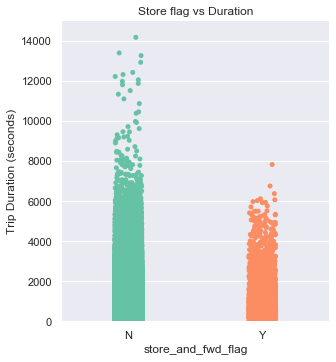

In [71]:
plt.figure(figsize=(10,7))

sns.catplot(x="store_and_fwd_flag",y="trip_duration",data=dataset)
plt.ylim(0,15000)
plt.ylabel('Trip Duration (seconds)')

plt.title('Store flag vs Duration')

- The flag was mostly stored for shorter trip durations. Contradicts our hypotheses
- Reason might be system error, lets further analyse on vendor

Text(0.5, 1.0, 'Store flag vs Duration')

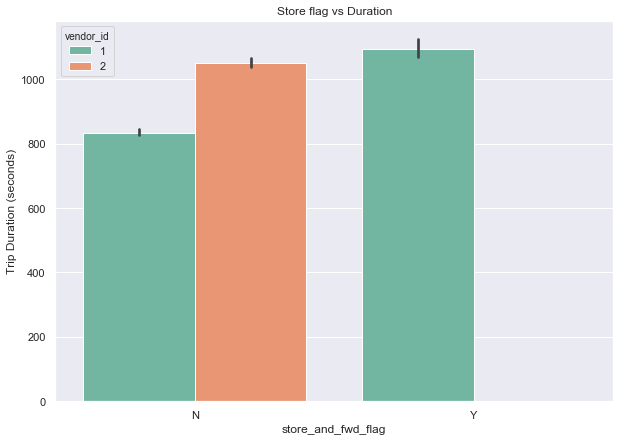

In [72]:
plt.figure(figsize=(10,7))

sns.barplot(x="store_and_fwd_flag",y="trip_duration",data=dataset,hue='vendor_id')

plt.ylabel('Trip Duration (seconds)')
plt.title('Store flag vs Duration')

- Here we can see that vendor 1 alone has recorded connection issue, this could mean that vendor 1 might be using low/poor frequency machine to record GPS.

In [81]:
dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'avg_speed', 'pickup_day_name',
       'dropoff_day_name', 'pickup_time', 'dropoff_time', 'pickup_month',
       'dropoff_month', 'Pick_time_frame', 'Drop_time_frame',
       'duration_in_mins', 'distance_bins'],
      dtype='object')

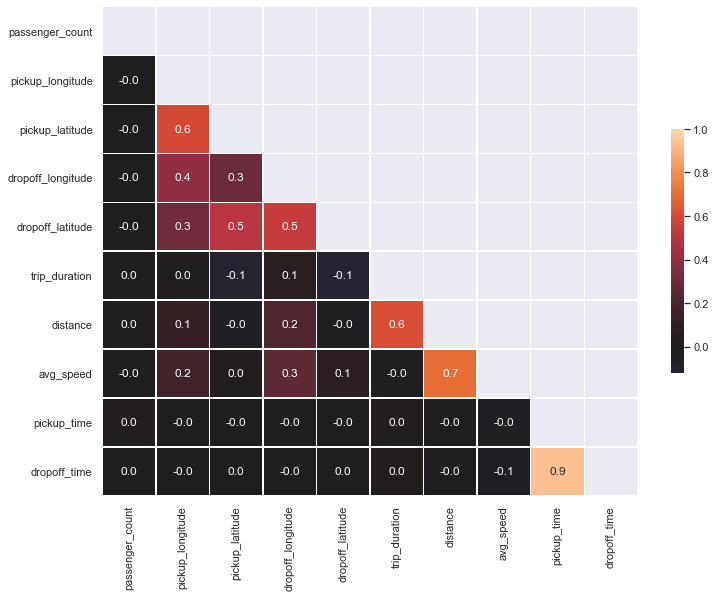

In [82]:
# Calculate the correlation matrix
df = dataset[['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','trip_duration', 'distance', 'avg_speed', 'pickup_time', 'dropoff_time']].copy()

corr = df.corr(method='spearman')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

#sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
#            square=True, linewidths=.5, cbar_kws={"shrink": .5});

sns.heatmap(corr, vmax=1, center=0, annot=True,fmt='.1f',mask=mask,
            linewidths=.5, cbar_kws={"shrink": .5});

# MEAN MODEL

In [73]:
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [74]:
data1=shuffle(dataset,random_state=100)

divide=int(data1.shape[0]/4)

train=dataset.loc[:3*divide,:]
test=dataset.loc[3*divide+1:]

In [75]:
train["simple_mean"]=train["trip_duration"].mean()

test["simple_mean"]=train["trip_duration"].mean()

In [76]:
error=np.sqrt(msle(test["trip_duration"],test["simple_mean"]))
error1=np.sqrt(msle(train["trip_duration"],train["simple_mean"]))
print('RMSLE ON TRAINING SET:',error1)
print('RMSLE ON VALIDATION SET: ',error)

RMSLE ON TRAINING SET: 0.8867996036320951
RMSLE ON VALIDATION SET:  0.8866907196375282


In [77]:
combo=pd.pivot_table(train,values="trip_duration",index=["vendor_id"],aggfunc=np.mean)

In [78]:
test["vendor_id_mean"]=0
for i in train["vendor_id"].unique():
    test["vendor_id_mean"][test["vendor_id"]==i]=(train["trip_duration"][train["vendor_id"]==i].mean())
    print(test["vendor_id_mean"][test["vendor_id"]==i])

546994    1051.372687
546995    1051.372687
546996    1051.372687
547001    1051.372687
547003    1051.372687
             ...     
729312    1051.372687
729314    1051.372687
729316    1051.372687
729317    1051.372687
729321    1051.372687
Name: vendor_id_mean, Length: 97291, dtype: float64
546991    839.053053
546992    839.053053
546993    839.053053
546997    839.053053
546998    839.053053
             ...    
729313    839.053053
729315    839.053053
729318    839.053053
729319    839.053053
729320    839.053053
Name: vendor_id_mean, Length: 85040, dtype: float64


In [79]:
np.sqrt(msle(test["trip_duration"],test["vendor_id_mean"]))

0.888825171851703